# What is my task?

Mr Cj need's an application which can predict food in application, after prediction the application will have it's own logic to calculate calories ... i have to create the model which predict food.

# What is our data?

We will use [this dataset](https://huggingface.co/datasets/ethz/food101) from hugging face.

This dataset consists of **101 food categories**, with **101'000 images**. For each class, **250 manually reviewed test images** are provided as well as **750 training images**.

On purpose, the training images were **not cleaned**, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side **length of 512 pixels**.

A sample from the training set is provided below:
```json
{
  'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512 at 0x276021C5EB8>,
  'label': 23
}
```

Labels are encoded as below:
```json
{
  "apple_pie": 0,
  "baby_back_ribs": 1,
  "baklava": 2,
  "beef_carpaccio": 3,
  "beef_tartare": 4,
  "beet_salad": 5,
  "beignets": 6,
  "bibimbap": 7,
  "bread_pudding": 8,
  "breakfast_burrito": 9,
  "bruschetta": 10,
  "caesar_salad": 11,
  "cannoli": 12,
  "caprese_salad": 13,
  "carrot_cake": 14,
  "ceviche": 15,
  "cheesecake": 16,
  "cheese_plate": 17,
  "chicken_curry": 18,
  "chicken_quesadilla": 19,
  "chicken_wings": 20,
  "chocolate_cake": 21,
  "chocolate_mousse": 22,
  "churros": 23,
  "clam_chowder": 24,
  "club_sandwich": 25,
  "crab_cakes": 26,
  "creme_brulee": 27,
  "croque_madame": 28,
  "cup_cakes": 29,
  "deviled_eggs": 30,
  "donuts": 31,
  "dumplings": 32,
  "edamame": 33,
  "eggs_benedict": 34,
  "escargots": 35,
  "falafel": 36,
  "filet_mignon": 37,
  "fish_and_chips": 38,
  "foie_gras": 39,
  "french_fries": 40,
  "french_onion_soup": 41,
  "french_toast": 42,
  "fried_calamari": 43,
  "fried_rice": 44,
  "frozen_yogurt": 45,
  "garlic_bread": 46,
  "gnocchi": 47,
  "greek_salad": 48,
  "grilled_cheese_sandwich": 49,
  "grilled_salmon": 50,
  "guacamole": 51,
  "gyoza": 52,
  "hamburger": 53,
  "hot_and_sour_soup": 54,
  "hot_dog": 55,
  "huevos_rancheros": 56,
  "hummus": 57,
  "ice_cream": 58,
  "lasagna": 59,
  "lobster_bisque": 60,
  "lobster_roll_sandwich": 61,
  "macaroni_and_cheese": 62,
  "macarons": 63,
  "miso_soup": 64,
  "mussels": 65,
  "nachos": 66,
  "omelette": 67,
  "onion_rings": 68,
  "oysters": 69,
  "pad_thai": 70,
  "paella": 71,
  "pancakes": 72,
  "panna_cotta": 73,
  "peking_duck": 74,
  "pho": 75,
  "pizza": 76,
  "pork_chop": 77,
  "poutine": 78,
  "prime_rib": 79,
  "pulled_pork_sandwich": 80,
  "ramen": 81,
  "ravioli": 82,
  "red_velvet_cake": 83,
  "risotto": 84,
  "samosa": 85,
  "sashimi": 86,
  "scallops": 87,
  "seaweed_salad": 88,
  "shrimp_and_grits": 89,
  "spaghetti_bolognese": 90,
  "spaghetti_carbonara": 91,
  "spring_rolls": 92,
  "steak": 93,
  "strawberry_shortcake": 94,
  "sushi": 95,
  "tacos": 96,
  "takoyaki": 97,
  "tiramisu": 98,
  "tuna_tartare": 99,
  "waffles": 100
}

```

# What is my plan?

Im going to create a model with architecture VERYYYYY similare to `effnetb0`. I will also use transfer learning too.

# Hands On CODE!!

## Import needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from datasets import load_dataset, load_from_disk
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed # for some speed up
from tqdm import tqdm
import itertools

RANDOM_SEED = 42

2026-02-13 22:32:33.847574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Dataset part

### Download and Save dataset

In [3]:
data = load_dataset(path="ethz/food101")

README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00008.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

data/train-00001-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00002-of-00008.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

data/train-00003-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00004-of-00008.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

data/train-00005-of-00008.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

data/train-00006-of-00008.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

data/train-00007-of-00008.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

data/validation-00000-of-00003.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

data/validation-00001-of-00003.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

data/validation-00002-of-00003.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

In [4]:
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 75750
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 25250
    })
})

### Plot some images

(<matplotlib.image.AxesImage at 0x7a2f3287cce0>, 6)

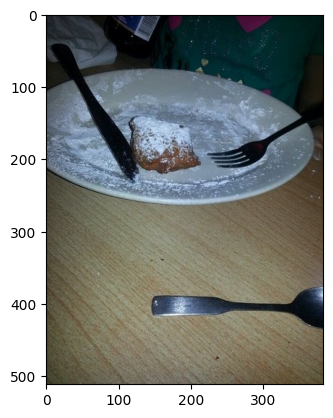

In [ ]:
plt.imshow(data['train'][0]['image']), data['train'][0]['label']

Good the image label is `6` what tit mean? well label`6` is `beingets`.

### Extract images into folders

In [5]:
trainFolder = Path("./dataset/train/")
validFolder = Path("./dataset/validation/")

trainFolder.mkdir(exist_ok=True, parents=True)
validFolder.mkdir(exist_ok=True, parents=True)

In [6]:
def save_images(data, path:Path):
  idx, sample = data
  # setup folder as name as label
  labelFolder = path / str(sample["label"])
  labelFolder.mkdir(exist_ok=True)

  # save image in the folder (we save as jpg)
  image = sample["image"]
  imagePath = labelFolder / f"image_{idx:09d}.jpg"

  image.save(imagePath)
  return idx

In [7]:
with ThreadPoolExecutor(max_workers=8) as executor:
  items = data['train']
  list(tqdm(executor.map(save_images, enumerate(items), itertools.repeat(trainFolder)), total=len(items)))

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 75750/75750 [00:00<00:00, 269975.98it/s]


In [8]:
with ThreadPoolExecutor(max_workers=8) as executor:
  items = data['validation']
  list(tqdm(executor.map(save_images, enumerate(items), itertools.repeat(validFolder)), total=len(items)))

100%|██████████| 25250/25250 [00:00<00:00, 335701.73it/s]


### Make datas Ready

In [9]:
TARGET_SIZE = (256, 256)
BATCH_SIZE = 32

tf_train_dataset = tf.keras.utils.image_dataset_from_directory(
    trainFolder,
    seed=RANDOM_SEED,
    image_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
).prefetch(tf.data.AUTOTUNE)

tf_valid_dataset = tf.keras.utils.image_dataset_from_directory(
    validFolder,
    seed=RANDOM_SEED,
    image_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
).prefetch(tf.data.AUTOTUNE)

print("tf_train_dataset created:", tf_train_dataset)
print("tf_valid_dataset created:", tf_valid_dataset)

Found 75750 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.
tf_train_dataset created: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
tf_valid_dataset created: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


## My Model

### Setup block generator

In [2]:
def generate_block(inp_tensor, filter_count):
  x = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=filter_count, padding="same")(inp_tensor)
  x = tf.keras.layers.ELU()(x)
  x = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=filter_count, padding="same")(x)
  x = tf.keras.layers.ELU()(x)
  return x

### Setup model architecture

In [3]:
repeatBlock = 1

input = tf.keras.layers.Input(shape=(256, 256, 3))

X = tf.keras.layers.Rescaling(1./255)(input)
X = tf.keras.layers.Conv2D(kernel_size=(7, 7), filters=64, padding="same", activation="relu", strides=(2, 2))(X)
X = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(X)

# stage 1: we create 1 block with 64 channels
for i in range(repeatBlock):
  X = tf.keras.layers.concatenate([generate_block(X, 64), X])
repeatBlock += 1

X = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(X)

# stage 2: we create 2 block with 128 channels
for i in range(repeatBlock):
  X = tf.keras.layers.concatenate([generate_block(X, 128), X])
repeatBlock += 1

X = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(X)

# stage 3: we create 3 block with 256 channels
for i in range(repeatBlock):
  X = tf.keras.layers.concatenate([generate_block(X, 256), X])

2026-02-13 22:34:39.354356: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
X = tf.keras.layers.GlobalAveragePooling2D()(X)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(units=101, activation="softmax")(X)

model = tf.keras.Model(inputs=input, outputs=X)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  9472        ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

### Compile and fit

In [5]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath="./my-food-101-model.keras", save_best_only=True, monitor="val_loss"),
    tf.keras.callbacks.EarlyStopping(patience=2),
]

optim = tf.keras.optimizers.SGD(learning_rate=1e-1, momentum=0.95)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=optim, metrics=["sparse_categorical_accuracy"])

In [ ]:
hist = model.fit(x=tf_train_dataset, validation_data=tf_valid_dataset, epochs=5, callbacks=callbacks)

Epoch 1/5
  10/2368 ━━━━━━━━━━━━━━━━━━━━ 9:27:07 14s/step - loss: 5.2938 - sparse_categorical_accuracy: 0.0065

KeyboardInterrupt: 

## EfficientNetB0

### Download effnetb050

In [8]:
effnetb0 = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape= (256, 256, 3),
    classes=101
)

effnetb0.summary()

16705208/16705208 [==============================] - 33s 2us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_5 (Rescaling)        (None, 256, 256, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 256, 256, 3)  7          ['rescaling_5[0][0]']            
 )                                                                                                
                   

### Setup Architecture

In [ ]:
effnetb0.trainable = False

input = tf.keras.layers.Input(shape=(256, 256, 3))
X = effnetb0(inputs=X, training=False)
X = tf.keras.layers.GlobalAveragePooling2D()(X)
X = tf.keras.layers.Dense(units=101, activation="softmax")(X)

effnetb0_model = tf.keras.Model(inputs=input, outputs=X)
effnetb0_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
___________________________________________

In [10]:
effnetb0_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

hist = effnetb0_model.fit(x=tf_train_dataset, validation_data=tf_valid_dataset, epochs=5, batch_size=BATCH_SIZE)

NameError: name 'tf_train_dataset' is not defined